In [1]:
import sys
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from importlib import reload
import sklearn.metrics
from scipy.optimize import curve_fit
from matplotlib.ticker import FormatStrFormatter
codebase_path = '/data/home/wpw035/Codebase'
sys.path.insert(0, codebase_path) #add path to my codebase models

In [2]:
from Genral_plotting import plotting as plot_nb
reload(plot_nb)

<module 'Genral_plotting.plotting' from '/data/home/wpw035/Codebase/Genral_plotting/plotting.py'>

# Data read in

In [3]:
def find_repeats(dir_path, num_runs):
    r2_reps = {}
    mse_reps = {}
    rho_reps = {}
    for run in range(num_runs):
        temp_df = pd.read_csv(f'{dir_path}/run{run}')
        r2_reps[f'run{run}'] = temp_df['r2']
        mse_reps[f'run{run}'] = temp_df['mse']
        rho_reps[f'run{run}'] = temp_df['rho']
    r2_reps = pd.DataFrame(r2_reps)
    mse_reps = pd.DataFrame(mse_reps)
    rho_reps = pd.DataFrame(rho_reps)
    
    r2_reps.index = temp_df['train size']
    mse_reps.index = temp_df['train size']
    rho_reps.index = temp_df['train size']
    
    return r2_reps, mse_reps, rho_reps

In [6]:
path_cnn = 'Neural-net/Unseen_cell_line_testing/LC-metric-results/RNA'
path_cnn_hot = 'Neural-net/Unseen_cell_line_testing/LC-metric-results/One-hot'
path_cnn_prot = 'Neural-net/Unseen_cell_line_testing/LC-metric-results/Prot'
path_mm = 'Neural-net/Unseen_cell_line_testing/LC-metric-results/Mean_model'

path_xg_prot = 'XGboost/Unseen_cell_line_testing/LC-metric-results/Prot'
path_xg_rna = 'XGboost/Unseen_cell_line_testing/LC-metric-results/RNA'
path_xg_hot = 'XGboost/Unseen_cell_line_testing/LC-metric-results/One-hot'


In [8]:
r2_cnn_rna, mse_cnn_rna, rho_cnn_rna = find_repeats(path_cnn, 30)
r2_cnn_hot, mse_cnn_hot, rho_cnn_hot = find_repeats(path_cnn_hot, 30)
r2_cnn_prot, mse_cnn_prot, rho_cnn_prot = find_repeats(path_cnn_prot, 30)
r2_mm, mse_mm, rho_mm = find_repeats(path_mm, 30)

r2_xg_rna, mse_xg_rna, rho_xg_rna = find_repeats(path_xg_rna, 30)
r2_xg_prot, mse_xg_prot, rho_xg_prot = find_repeats(path_xg_prot, 30)
r2_xg_hot, mse_xg_hot, rho_xg_hot = find_repeats(path_xg_hot, 30)


In [9]:
r2_xg_rna

,run0,run1,run2,run3,run4,run5,run6,run7,run8,run9,...,run20,run21,run22,run23,run24,run25,run26,run27,run28,run29
train size,,,,,,,,,,,,,,,,,,,,,
2,-0.004357,-0.004474,-0.339281,-0.001014,-0.000392,-0.576636,-0.002394,-0.512335,-0.001019,-0.001108,...,-0.000843,-0.001842,-0.029068,-0.027643,-0.011300,-0.440593,-0.343354,-0.012298,-0.334456,-0.028195
3,-0.005895,0.004215,-0.341050,0.001187,-0.083473,-0.504873,-0.005729,-0.442591,-0.001679,0.001636,...,-0.004072,-0.049152,-0.039575,-0.019748,-0.015206,-0.337396,-0.123406,-0.033873,-0.211791,-0.000643
4,-0.000630,-0.027834,-0.038519,-0.028024,-0.040437,-0.059480,-0.020243,-0.174083,-0.001274,-0.139743,...,-0.004102,-0.069506,-0.352691,-0.083352,-0.149675,-0.354816,-0.036725,-0.008368,-0.134767,0.000215
5,0.005851,-0.018453,-0.124870,-0.006180,-0.020007,-0.062538,-0.015780,-0.073485,-0.077355,-0.068339,...,-0.009800,-0.060924,-0.347217,-0.048644,-0.096257,-0.316712,-0.043719,-0.050374,-0.207853,-0.011508
6,0.003299,-0.022667,-0.156428,-0.016280,-0.041513,-0.082769,-0.006184,-0.083392,-0.097776,-0.028815,...,-0.001990,-0.056585,-0.347868,-0.183036,-0.067312,-0.292343,-0.060769,-0.027805,-0.103515,-0.038063
8,-0.024919,-0.020479,-0.185292,-0.040090,-0.090663,-0.046457,-0.059644,-0.058368,-0.063303,-0.037563,...,0.003922,-0.031743,-0.095778,-0.216468,-0.071802,-0.113509,-0.039521,-0.046443,-0.097417,-0.101191
10,-0.030936,-0.072552,-0.304103,-0.013562,-0.040487,-0.032045,-0.030571,-0.179858,-0.038440,-0.016610,...,-0.009926,-0.042515,-0.097430,-0.107105,-0.113688,-0.030305,-0.097574,-0.025377,-0.102891,-0.081608
13,-0.040882,-0.035579,-0.225064,-0.078114,-0.041539,-0.036343,-0.054696,-0.088064,-0.000400,-0.042636,...,-0.014551,-0.097209,-0.113359,-0.057122,-0.039368,-0.030323,-0.039927,-0.038936,-0.061449,-0.061357
16,-0.024403,-0.062260,-0.226711,-0.098204,-0.035485,-0.065161,-0.020399,-0.218086,-0.102772,-0.051332,...,-0.031434,-0.115953,-0.188756,-0.106119,-0.109429,-0.127791,-0.124903,-0.033737,-0.102265,-0.049444


In [10]:
r2_cnn_prot.mean(axis=1).iloc[-1]

0.7584650389873153

In [11]:
r2_cnn_rna.iloc[-1]

run0     0.787337
run1     0.761989
run2     0.777853
run3     0.762570
run4     0.775262
run5     0.747464
run6     0.767935
run7     0.765682
run8     0.746626
run9     0.761767
run10    0.743055
run11    0.760135
run12    0.773891
run13    0.763692
run14    0.765228
run15    0.756758
run16    0.763698
run17    0.752343
run18    0.752816
run19    0.759460
run20    0.762397
run21    0.770924
run22    0.768047
run23    0.763224
run24    0.766326
run25    0.767493
run26    0.755242
run27    0.769687
run28    0.751977
run29    0.772307
Name: 198668, dtype: float64

In [12]:
r2_cnn_rna.iloc[-1] 

run0     0.787337
run1     0.761989
run2     0.777853
run3     0.762570
run4     0.775262
run5     0.747464
run6     0.767935
run7     0.765682
run8     0.746626
run9     0.761767
run10    0.743055
run11    0.760135
run12    0.773891
run13    0.763692
run14    0.765228
run15    0.756758
run16    0.763698
run17    0.752343
run18    0.752816
run19    0.759460
run20    0.762397
run21    0.770924
run22    0.768047
run23    0.763224
run24    0.766326
run25    0.767493
run26    0.755242
run27    0.769687
run28    0.751977
run29    0.772307
Name: 198668, dtype: float64

In [13]:
r2_cnn_rna.index[-1]

198668

In [14]:
#remove duplicated train size 2 point
r2_cnn_rna = r2_cnn_rna[~r2_cnn_rna.index.duplicated()]
mse_cnn_rna = mse_cnn_rna[~mse_cnn_rna.index.duplicated()]
rho_cnn_rna = rho_cnn_rna[~rho_cnn_rna.index.duplicated()]
#remove last data point as not evenly spaced with the rest of the datapoints
mse_cnn_hot = mse_cnn_hot[: -1]
mse_cnn_prot = mse_cnn_prot[: -1]
mse_xg_rna = mse_xg_rna[: -1]
mse_xg_prot = mse_xg_prot[: -1]
mse_xg_hot = mse_xg_hot[: -1]
#remove data point at 26680 as only in rna results
mse_cnn_rna.drop(index=26680, inplace=True)


In [15]:
assert (mse_cnn_rna.index == mse_cnn_hot.index).all()
assert (mse_cnn_hot.index == mse_cnn_prot.index).all()
assert (mse_cnn_prot.index == mse_xg_rna.index).all()
assert (mse_xg_rna.index == mse_xg_prot.index).all()
assert (mse_xg_prot.index == mse_xg_hot.index).all()
assert (mse_mm.index == mse_xg_hot.index).all()

# Plotting

In [16]:
#have same x, y lables for most plots 
_figsize = (7.2, 4.5)
_fontsize = 9
_ax_labels = [' Traning dataset size (log2 scale)', 
              'Mean squared error (log2 scale)']
_colours  = plt.cm.Dark2
_linestyles = ['solid', 'dotted', 'dashed', 'dashdot']


In [17]:
#have same x, y lables for most plots 
_ax_labels = [' Traning dataset size (log2 scale)', 
              'Mean squared error (log2 scale)']
def lc_plot(rep_dfs=None, start=0, end=None, num_gls=4, alpha=0.5, ax=None,
            labels=['Benchmark \n One-Hot', 'Proteomics', 'RNA'], 
            leg=True, line=True, err_type='cont', m_size=20):
    #set leg to false to only have ledgend on one plot
    if rep_dfs == None:
        raise Exception('input dataframes')
    x = rep_dfs[0].index[start: end]
    y_mean = [df.mean(axis=1)[start: end] for df in rep_dfs]
    y_err = [df.std(axis=1)[start: end] / len(df.T) ** 0.5 
                   for df in rep_dfs]
    #95% CV for both z and t is 2.0 thus, 95%CI = CV*2.0
    #but just using SE.
    y_err = np.array(y_err) #*2.0
    if labels:
        labels = labels[0: len(rep_dfs)]

    plot_nb.multi_lines_scatter(x=x, ys=y_mean, ax=ax, labels=labels,
                                scale='log', num_grid_lines=num_gls,
                                alpha=alpha, leg=leg, line=line, 
                                errors=y_err, ax_labels=None, 
                                err_type=err_type, m_size=m_size)

    ax.yaxis.set_major_formatter(plt.ScalarFormatter())

## Fig plots

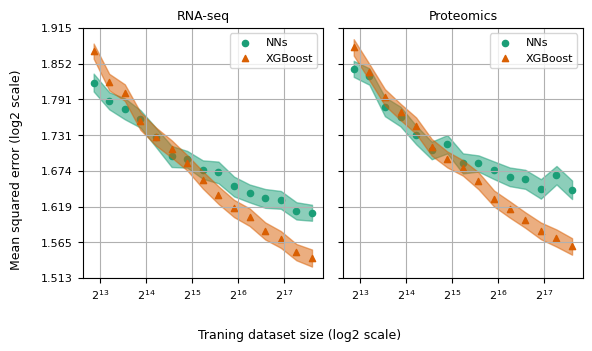

In [76]:
# model comp plots
fig, axs = plt.subplots(1, 2, figsize=_figsize, sharex=True, sharey=True, 
                        tight_layout=True)
labels = ['NNs', 'XGBoost']
start = 34
lc_plot([mse_cnn_rna, mse_xg_rna], ax=axs[0], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.5)
lc_plot([mse_cnn_prot, mse_xg_prot], ax=axs[1], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.5)
for ax in axs:
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0].set_title('RNA-seq', fontsize=_fontsize)
axs[1].set_title('Proteomics',fontsize=_fontsize)
fig.supxlabel(_ax_labels[0], fontsize=_fontsize)
fig.supylabel(_ax_labels[1], fontsize=_fontsize)
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
'''
#add fit plots
cols1 = _colours(np.arange(0, 2))
cols2 = _colours(np.arange(2, 4))

plot_fit(axs[0], fit_cnn_rna, start, c=cols1[0], l_style=_linestyles[0], 
         label='NN fit')
plot_fit(axs[0], fit_xg_rna, start, c=cols1[1], l_style=_linestyles[0], 
         label='XGBoost fit')
plot_fit(axs[1], fit_cnn_prot, start, c=cols1[0], 
         label='CNN fit')
plot_fit(axs[1], fit_xg_prot, start, c=cols1[1], 
         label='XGboost fit')


#add equations to the plot
add_equation(axs[0], fit_cnn_rna.loc[2], (2**15.97, 1.70), 'NN')
add_equation(axs[0], fit_xg_rna.loc[2], (2**14, 1.554), 'XGB')
add_equation(axs[1], fit_cnn_prot.loc[2], (2**15.97, 1.70), 'NN')
add_equation(axs[1], fit_xg_prot.loc[2], (2**14, 1.554), 'XGB')
'''
#plt.legend()
#plt.savefig('Figs/LC_CNN_V_XGB_ra_prot_intesection.png', dpi=600, bbox_inches='tight')

plt.plot()
plt.show()

In [26]:
mse_mm

,run0,run1,run2,run3,run4,run5,run6,run7,run8,run9,...,run20,run21,run22,run23,run24,run25,run26,run27,run28,run29
train size,,,,,,,,,,,,,,,,,,,,,
2,10.749559,11.241531,10.887085,10.958630,10.798609,11.685433,10.787551,11.310773,11.259404,11.003038,...,11.269003,10.867011,11.422310,11.041781,11.339980,11.078935,11.159016,10.855678,11.024713,10.714667
3,10.699644,11.217060,10.886826,10.913525,10.796927,11.660780,10.781352,11.306564,11.197445,10.973331,...,11.254168,10.839340,11.412299,10.966800,11.281285,11.060968,11.112277,10.845293,11.008479,10.686432
4,10.667259,11.216557,10.885921,10.905752,10.760581,11.597486,10.719657,11.256527,11.176380,10.980082,...,11.241244,10.824946,11.394155,10.966777,11.272570,11.055821,11.119291,10.791310,11.001121,10.682389
5,10.657310,11.166952,10.883394,10.880243,10.709778,11.551591,10.728896,11.197256,11.181372,10.975980,...,11.256709,10.826214,11.417386,10.977290,11.255292,11.035959,11.106983,10.785612,11.003781,10.676518
6,10.658041,11.161529,10.861591,10.866921,10.658766,11.552124,10.652575,11.111989,11.184391,10.972231,...,11.256900,10.799431,11.418650,10.963586,11.283179,10.991660,11.103575,10.712939,10.959496,10.674298
8,10.572860,11.126574,10.836685,10.801579,10.699623,11.454317,10.611108,11.030646,11.071312,10.986777,...,11.139927,10.757374,11.393447,10.935030,11.244040,10.860383,10.871527,10.683497,10.895316,10.691640
10,10.574969,11.135122,10.862147,10.732019,10.650274,11.384805,10.532847,10.957090,10.944585,10.977804,...,11.127981,10.731849,11.397319,10.877089,11.198121,10.820334,10.818676,10.651033,10.868586,10.632159
13,10.466516,10.992793,10.796279,10.696910,10.499105,11.334999,10.505229,10.804176,10.908768,10.908370,...,11.118738,10.667545,11.322187,10.677453,11.095489,10.723045,10.682749,10.551970,10.819258,10.639862
16,10.328674,10.952939,10.685351,10.634731,10.449048,11.306537,10.478373,10.741904,10.903508,10.829790,...,11.119746,10.634330,11.265869,10.576223,10.934306,10.670994,10.748595,10.501862,10.709876,10.574575


In [27]:
mse_cnn_prot

,run0,run1,run2,run3,run4,run5,run6,run7,run8,run9,...,run20,run21,run22,run23,run24,run25,run26,run27,run28,run29
train size,,,,,,,,,,,,,,,,,,,,,
2,6.913913,6.758763,6.810912,6.722451,6.813563,6.661926,6.701898,7.051204,6.799632,6.911938,...,7.007135,6.860592,6.698934,6.728455,6.666404,6.812235,7.346588,6.577041,7.052052,6.839971
3,6.862377,6.865783,6.791330,6.718936,6.713597,6.727705,6.650145,8.144249,6.786263,6.913196,...,6.953840,6.815548,6.741467,6.718559,6.689324,7.029735,6.607928,6.591334,6.730955,6.847589
4,6.894840,6.845723,6.738494,6.740459,6.741448,6.626853,6.689763,6.688151,6.771604,6.915320,...,6.957379,6.839848,6.821936,6.707484,6.604658,7.047009,6.641945,6.646615,6.755681,6.850406
5,6.890218,6.881115,6.732962,6.705642,6.703226,6.608517,6.677144,6.783452,6.794482,6.882882,...,6.979327,6.876384,6.805502,6.725465,6.596293,6.821785,6.671724,6.599195,6.810638,6.861372
6,6.940163,6.854146,6.822192,6.727641,6.745952,6.641803,6.694391,6.738247,6.747216,6.922516,...,7.003365,6.844175,6.781728,6.732428,6.635231,6.862567,6.641096,6.567216,6.790012,6.886839
8,6.892743,6.867463,6.781649,6.717314,6.748646,6.590277,6.666587,6.689090,6.733677,6.936201,...,7.003100,6.890910,6.843281,6.722782,6.637076,6.812148,6.581123,6.607160,6.711910,6.870306
10,6.852496,6.852986,6.728657,6.721085,6.778396,6.600906,6.677858,6.773113,6.753906,6.907981,...,7.023706,6.829905,6.833166,6.706447,6.637077,6.879684,6.579016,6.619358,6.697153,6.879528
13,6.797226,6.857355,6.747244,6.673798,6.798146,6.638461,6.672311,6.748155,6.746525,6.892308,...,7.012973,6.833763,6.862646,6.676487,6.609758,6.795081,6.591668,6.597641,6.615011,6.894443
16,6.821581,6.842990,6.643934,6.603001,6.821022,6.578903,6.663266,6.812162,6.715178,6.918888,...,7.016301,6.838091,6.688872,6.538084,6.596328,6.895591,6.573957,6.588796,6.677508,6.855510


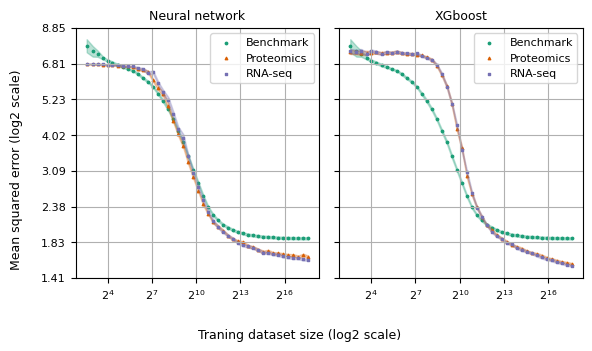

In [19]:
#plots of full LC no fits with mean model as benchmark.
_figsize = (6, 3.5)
_fontsize = 9
fig, axs = plt.subplots(1, 2, figsize=_figsize, sharex=True, sharey=True, 
                        tight_layout=True)
labels = ['Benchmark', 'Proteomics', 'RNA-seq']
start = 4
lc_plot([mse_mm, mse_cnn_prot, mse_cnn_rna], ax=axs[0], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.3, m_size=3)
lc_plot([mse_mm, mse_xg_prot, mse_xg_rna], ax=axs[1], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.3, m_size=3)


for ax in axs:
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0].set_title('Neural network', fontsize=_fontsize)
axs[1].set_title('XGboost',fontsize=_fontsize)
fig.supxlabel(_ax_labels[0], fontsize=_fontsize)
fig.supylabel(_ax_labels[1], fontsize=_fontsize)



axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


#plt.legend()
#plt.savefig('Figs/Data_comp_rna_prot_intesection.png', dpi=600, bbox_inches='tight')

plt.plot()
plt.show()

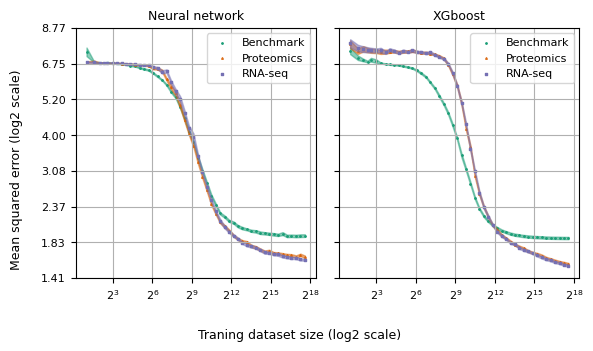

In [74]:
#plots of full LC no fits
#plots of full LC no fits with one-hot as benchmark. 

_figsize = (6, 3.5)
_fontsize = 9
fig, axs = plt.subplots(1, 2, figsize=_figsize, sharex=True, sharey=True, 
                        tight_layout=True)
labels = ['Benchmark', 'Proteomics', 'RNA-seq']
start = 0
lc_plot([mse_cnn_hot, mse_cnn_prot, mse_cnn_rna], ax=axs[0], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.5, m_size=1)
lc_plot([mse_xg_hot, mse_xg_prot, mse_xg_rna], ax=axs[1], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.5, m_size=1)


for ax in axs:
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0].set_title('Neural network', fontsize=_fontsize)
axs[1].set_title('XGboost',fontsize=_fontsize)
fig.supxlabel(_ax_labels[0], fontsize=_fontsize)
fig.supylabel(_ax_labels[1], fontsize=_fontsize)



axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


#plt.legend()
plt.savefig('Figs/Data_comp_rna_prot_intesection.png', dpi=600, bbox_inches='tight')

plt.plot()
plt.show()

## Dark mode  

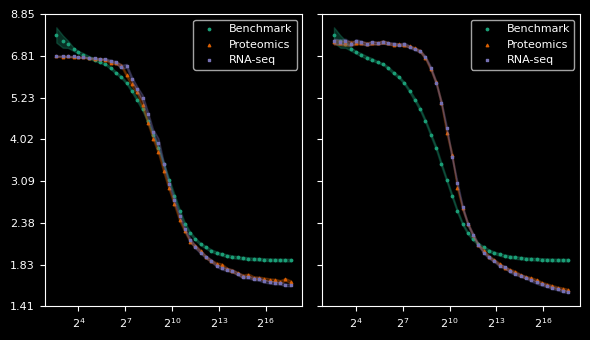

In [81]:
#plots of full LC no fits with mean model as benchmark.
_figsize = (6, 3.5)
_fontsize = 9
plt.style.use('dark_background')
fig, axs = plt.subplots(1, 2, figsize=_figsize, sharex=True, sharey=True, 
                        tight_layout=True)
labels = ['Benchmark', 'Proteomics', 'RNA-seq']
start = 4
lc_plot([mse_mm, mse_cnn_prot, mse_cnn_rna], ax=axs[0], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.3, m_size=3)
lc_plot([mse_mm, mse_xg_prot, mse_xg_rna], ax=axs[1], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.3, m_size=3)


for ax in axs:
    #ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
#axs[0].set_title('Neural network', fontsize=_fontsize)
#axs[1].set_title('XGboost',fontsize=_fontsize)
#fig.supxlabel(_ax_labels[0], fontsize=_fontsize)
#fig.supylabel(_ax_labels[1], fontsize=_fontsize)



axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


#plt.legend()
plt.savefig('Poster_scatter.png', dpi=1000, bbox_inches='tight')
plt.plot()
plt.show()

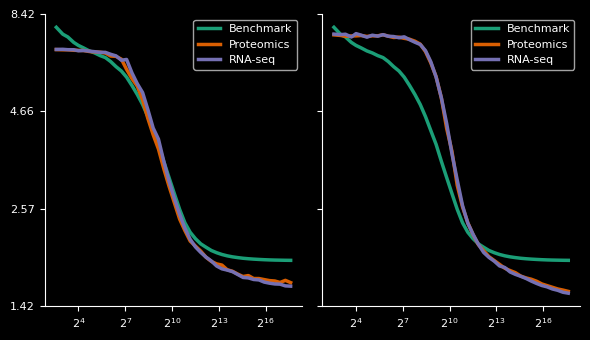

In [109]:
nn_dfs = [mse_mm, mse_cnn_prot, mse_cnn_rna]
xg_dfs = [mse_mm, mse_xg_prot, mse_xg_rna]
labels = ['Benchmark', 'Proteomics', 'RNA-seq']
start = 4
end = None

plt.style.use('dark_background')
fig, axs = plt.subplots(1, 2, figsize=_figsize, sharex=True, sharey=True, 
                        tight_layout=True)
x = nn_dfs[0].index[start: end]
y_nn = [df.mean(axis=1)[start: end] for df in nn_dfs]
y_xg = [df.mean(axis=1)[start: end] for df in xg_dfs]

for ax in axs:
    #ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
#axs[0].set_title('Neural network', fontsize=_fontsize)
#axs[1].set_title('XGboost',fontsize=_fontsize)
#fig.supxlabel(_ax_labels[0], fontsize=_fontsize)
#fig.supylabel(_ax_labels[1], fontsize=_fontsize)

plot_nb.multi_lines_scatter(x=x, ys=y_nn, ax=axs[0], labels=labels, 
                            scale='log', show_markers=False, 
                            linewidth=2.5, num_grid_lines=4, update_xticks=False)

plot_nb.multi_lines_scatter(x=x, ys=y_xg, ax=axs[1], labels=labels, 
                            scale='log', show_markers=False, 
                            linewidth=2.5, num_grid_lines=4, 
                            update_xticks=False)
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#plt.savefig('Poster_line.png', dpi=1000, bbox_inches='tight')

## Tabel results
results with full dataset that will go into a table

### R2

In [20]:
reps = 30 #number repeats
r2_xg_rna.mean(axis=1).iloc[-1], r2_xg_rna.std(axis=1).iloc[-1] / (reps ** 0.5)

(0.7745854926735245, 0.0018592828793622012)

In [21]:
'0.775(2)'

'0.775(2)'

In [22]:
r2_xg_prot.mean(axis=1).iloc[-1], r2_xg_prot.std(axis=1).iloc[-1] / (reps ** 0.5)

(0.7709552516595403, 0.0018456883491650385)

In [ ]:
'0.771(2)'

In [37]:
r2_mm.mean(axis=1).iloc[-1], r2_mm.std(axis=1).iloc[-1] / (reps ** 0.5)

(0.722891061038149, 0.001999531282802497)

In [38]:
r2_cnn_rna.mean(axis=1).iloc[-1], r2_cnn_rna.std(axis=1).iloc[-1] / (reps ** 0.5)

(0.763106179229223, 0.00177431550406237)

In [39]:
r2_cnn_prot.mean(axis=1).iloc[-1], r2_cnn_prot.std(axis=1).iloc[-1] / (reps ** 0.5)

(0.7584650389873153, 0.0015520764215588713)

In [46]:
table = {'XGBoost': [], 'Neural Network': []}
table['XGBoost'].append('0.775(2)')
table['XGBoost'].append('0.771(2)')
table['Neural Network'].append('0.763(2)')
table['Neural Network'].append('0.758(2)')
table = pd.DataFrame(table, index=['RNA-seq', 'Proteomics'])

In [47]:
table

,XGBoost,Neural Network
RNA-seq,0.775(2),0.763(2)
Proteomics,0.771(2),0.758(2)


In [53]:
0.758/ 0.771 

0.9831387808041504

In [52]:
0.763  / 0.775 

0.984516129032258

In [55]:
0.763 * 1.013

0.7729189999999999

## MSE

In [56]:
reps = 30 #number repeats
mse_xg_rna.mean(axis=1).iloc[-1], mse_xg_rna.std(axis=1).iloc[-1] / (reps ** 0.5)

(1.5419060475468698, 0.012393389148691078)

In [ ]:
'1.54(1)'

In [57]:
mse_xg_prot.mean(axis=1).iloc[-1], mse_xg_prot.std(axis=1).iloc[-1] / (reps ** 0.5)

(1.558854770697723, 0.012135286994664153)

In [ ]:
'1.56(1)'

In [58]:
mse_cnn_rna.mean(axis=1).iloc[-1], mse_cnn_rna.std(axis=1).iloc[-1] / (reps ** 0.5)

(1.609108663396504, 0.01208319090133355)

In [ ]:
'1.61(1)'

In [59]:
mse_cnn_prot.mean(axis=1).iloc[-1], mse_cnn_prot.std(axis=1).iloc[-1] / (reps ** 0.5)

(1.6442950268529948, 0.014341986326524798)

In [ ]:
'1.64(1)'

In [60]:
table_mse = {'XGBoost': [], 'Neural Network': []}
table_mse['XGBoost'].append('1.54(1)')
table_mse['XGBoost'].append('1.56(1)')
table_mse['Neural Network'].append('1.61(1)')
table_mse['Neural Network'].append('1.64(1)')
table_mse = pd.DataFrame(table_mse, index=['RNA-seq', 'Proteomics'])
table_mse

,XGBoost,Neural Network
RNA-seq,1.54(1),1.61(1)
Proteomics,1.56(1),1.64(1)


In [128]:
table_mse.to_csv('Figs/mse_rp.csv')

In [125]:
mse_mm.mean(axis=1).iloc[-1], mse_mm.std(axis=1).iloc[-1] / (reps ** 0.5)

(1.8828201160463964, 0.01599782825590662)

In [64]:
1.56 / 1.64

0.951219512195122

In [62]:
1.61 * 0.956

1.53916

## Spearmann

In [90]:
def extract_spear(df, train_set_size_ind=-1):
    vals = []
    for run in  df.iloc[train_set_size_ind]:
        val = float(run.split(',')[0].split('(')[1])
        vals.append(val)
    return np.array(vals)

In [92]:
reps = 30 #number repeats

spear_xg_rna = extract_spear(rho_xg_rna)
spear_xg_rna.mean(), spear_xg_rna.std() / (reps ** 0.5)

(0.8804104006014751, 0.0010162247140840523)

In [93]:
'0.880(1)'

'0.880(1)'

In [94]:
reps = 30 #number repeats

spear_xg_prot = extract_spear(rho_xg_prot)
spear_xg_prot.mean(), spear_xg_prot.std() / (reps ** 0.5)

(0.8783359510620693, 0.0010196012401905397)

In [95]:
'0.878(1)'

'0.878(1)'

In [96]:
spear_cnn_rna = extract_spear(rho_cnn_rna)
spear_cnn_rna.mean(), spear_cnn_rna.std() / (reps ** 0.5)

(0.874848484465205, 0.0009589104507804515)

In [97]:
'0.875(1)'

'0.875(1)'

In [98]:
rho_cnn_prot = extract_spear(rho_cnn_prot)
rho_cnn_prot.mean(), rho_cnn_prot.std() / (reps ** 0.5)

(0.8717969048677064, 0.0008542750381414933)

In [ ]:
'0.872(1)'

In [105]:
table_spear = {'XGBoost': [], 'Neural Network': []}
table_spear['XGBoost'].append('0.880(1)')
table_spear['XGBoost'].append('0.878(1)')
table_spear['Neural Network'].append('0.875(1)')
table_spear['Neural Network'].append('0.872(1)')
table_spear = pd.DataFrame(table_spear, index=['RNA-seq', 'Proteomics'])
table_spear

,XGBoost,Neural Network
RNA-seq,0.880(1),0.875(1)
Proteomics,0.878(1),0.872(1)


In [124]:
0.875 * 1.006

0.88025

In [118]:
extract_spear(rho_mm).mean(), extract_spear(rho_mm).std()

(0.8506622592820803, 0.006357894861525378)

In [111]:
(1 - (0.88 / 0.875)) * 100

-0.5714285714285783

In [114]:
1 - (0.88 / 0.875)

-0.005714285714285783

## variation anylsis 

## variation between omics keeping tt constant 

<BarContainer object of 30 artists>

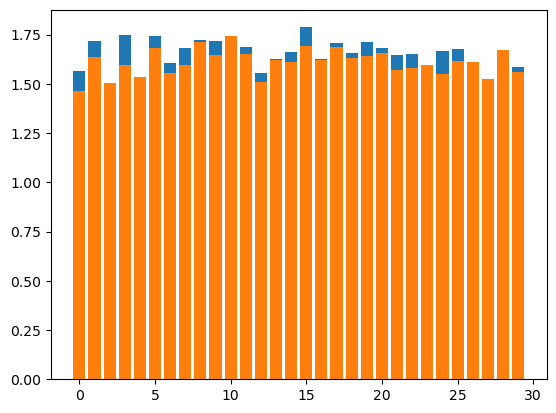

In [9]:
x = np.arange(len(mse_cnn_prot.T))
plt.bar(x, mse_cnn_prot.iloc[-1])
plt.bar(x, mse_cnn_rna.iloc[-1])

<BarContainer object of 30 artists>

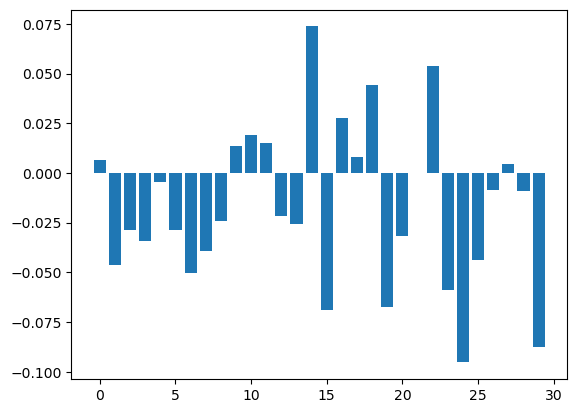

In [34]:
plt.bar(x, mse_xg_rna.iloc[-1] - mse_xg_prot.iloc[-1])

In [10]:
def ave_ranking(results1, results2, metric='mse'):
    '''comp where r1 is better than r2
    '''
    results1.index = range(len(results1))
    results2.index = range(len(results2))
    #mse lower better
    diff = results1 - results2
    if metric == 'mse':
        r1_mask = diff < 0
        r2_mask = diff > 0 
        num_r1_top = np.sum(r1_mask)
        # %improvement of r1 relative to r2 for r1s that are better than r2
        r1_per_improve = (1 - results1[r1_mask] / results2[r1_mask]) * 100
        r2_per_improve = (1 - results1[r2_mask] / results2[r2_mask]) * 100
        
    #other metircs higher better   
    else:
        r1_mask = diff > 0
        r2_mask = diff < 0 
        num_r1_top = np.sum(r1_mask)
        # %improvement of r1 relative to r2 for r1s that are better than r2
        r1_per_improve = (results1[r1_mask] / results2[r1_mask] - 1) * 100
        r2_per_improve = (results1[r2_mask] / results2[r2_mask] - 1) * 100
        
    print(num_r1_top)
    
    return r1_per_improve, r2_per_improve,   num_r1_top

In [109]:
r1_imp, r2_imp, _ = ave_ranking(mse_xg_rna.iloc[-1], mse_xg_prot.iloc[-1])

20


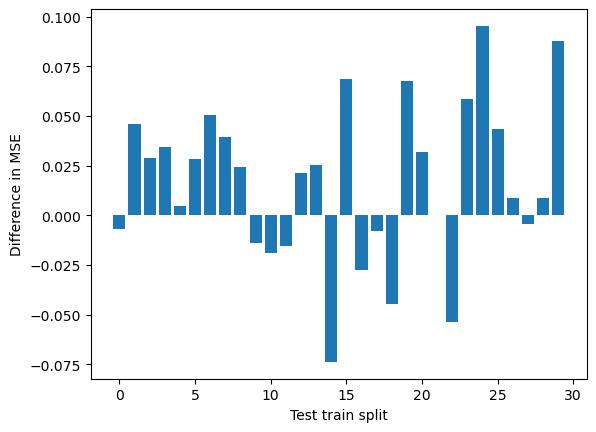

In [126]:
plt.bar(x, (mse_xg_prot.iloc[-1] - mse_xg_rna.iloc[-1]))
plt.ylabel('Difference in MSE')
plt.xlabel('Test train split')
plt.show()

## MSE plot

20
24


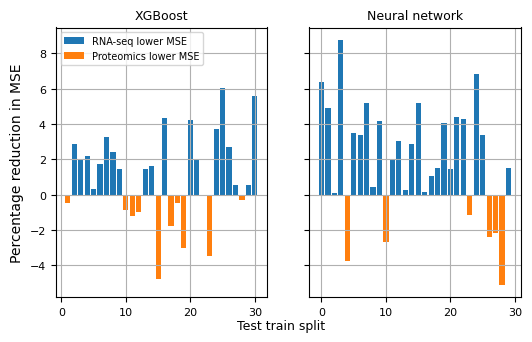

In [11]:
_figsize = (6, 3.5)
_fontsize = 9

fig, axs = plt.subplots(1, 2, figsize=_figsize, sharey=True)

rna_imp, xg_imp, _ = ave_ranking(mse_xg_rna.iloc[-1], mse_xg_prot.iloc[-1])
axs[0].bar(rna_imp.index + 1, rna_imp, label='RNA-seq lower MSE')
axs[0].bar(xg_imp.index + 1, xg_imp, label='Proteomics lower MSE')
axs[0].set_ylabel('Percentage reduction in MSE')

rna_imp, xg_imp, _ = ave_ranking(mse_cnn_rna.iloc[-1], mse_cnn_prot.iloc[-1])
axs[1].bar(rna_imp.index, rna_imp)
axs[1].bar(xg_imp.index, xg_imp,)

for ax in axs:
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0].set_title('XGBoost',fontsize=_fontsize)
axs[1].set_title('Neural network', fontsize=_fontsize)

fig.supxlabel('Test train split', fontsize=_fontsize)
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles, labels,loc='upper left',  fontsize=_fontsize - 2)
plt.savefig('Figs/tt_split_rna_prot_MSE.png', dpi=600, bbox_inches='tight')
plt.show()

20
24


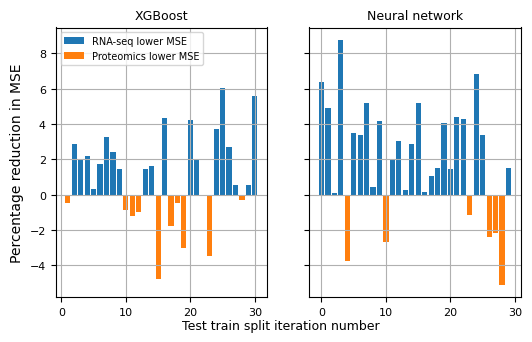

In [14]:
_figsize = (6, 3.5)
_fontsize = 9

fig, axs = plt.subplots(1, 2, figsize=_figsize, sharey=True)

rna_imp, xg_imp, _ = ave_ranking(mse_xg_rna.iloc[-1], mse_xg_prot.iloc[-1])
axs[0].bar(rna_imp.index + 1, rna_imp, label='RNA-seq lower MSE')
axs[0].bar(xg_imp.index + 1, xg_imp, label='Proteomics lower MSE')
axs[0].set_ylabel('Percentage reduction in MSE')

rna_imp, xg_imp, _ = ave_ranking(mse_cnn_rna.iloc[-1], mse_cnn_prot.iloc[-1])
axs[1].bar(rna_imp.index, rna_imp)
axs[1].bar(xg_imp.index, xg_imp,)

for ax in axs:
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0].set_title('XGBoost',fontsize=_fontsize)
axs[1].set_title('Neural network', fontsize=_fontsize)

fig.supxlabel('Test train split iteration number', fontsize=_fontsize)
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles, labels,loc='upper left',  fontsize=_fontsize - 2)
plt.savefig('Figs/tt_split_rna_prot_MSE.png', dpi=600, bbox_inches='tight')
plt.show()

20
24


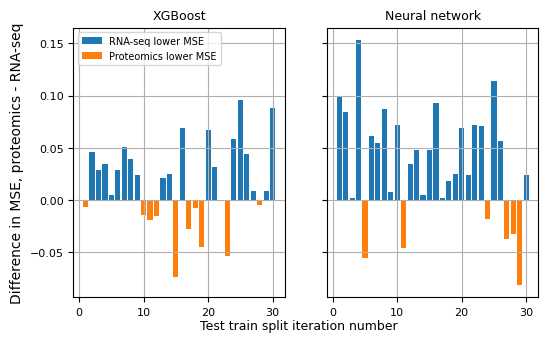

In [13]:
_figsize = (6, 3.5)
_fontsize = 9

fig, axs = plt.subplots(1, 2, figsize=_figsize, sharey=True)

rna_imp, prot_imp, _ = ave_ranking(mse_xg_rna.iloc[-1], mse_xg_prot.iloc[-1])
rna_runs = rna_imp.index
prot_runs = prot_imp.index
diff = mse_xg_prot.iloc[-1] - mse_xg_rna.iloc[-1] 
axs[0].bar(rna_runs + 1, diff.iloc[rna_runs], label='RNA-seq lower MSE')
axs[0].bar(prot_runs+ 1, diff.iloc[prot_runs], label='Proteomics lower MSE')
axs[0].set_ylabel('Difference in MSE, proteomics - RNA-seq')

rna_imp, prot_imp, _ = ave_ranking(mse_cnn_rna.iloc[-1], mse_cnn_prot.iloc[-1])
rna_runs = rna_imp.index
prot_runs = prot_imp.index
diff = mse_cnn_prot.iloc[-1] - mse_cnn_rna.iloc[-1] 
axs[1].bar(rna_runs + 1, diff.iloc[rna_runs], label='RNA-seq lower MSE')
axs[1].bar(prot_runs + 1, diff.iloc[prot_runs], label='Proteomics lower MSE')

for ax in axs:
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0].set_title('XGBoost',fontsize=_fontsize)
axs[1].set_title('Neural network', fontsize=_fontsize)

fig.supxlabel('Test train split iteration number', fontsize=_fontsize)
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles, labels,loc='upper left',  fontsize=_fontsize - 2)
plt.savefig('Figs/tt_split_rp_MSE_diff.png', dpi=600, bbox_inches='tight')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2acfd2886ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x2acfd28be210>,
 'boxes': [<matplotlib.lines.Line2D at 0x2acfd2886b50>,
 'medians': [<matplotlib.lines.Line2D at 0x2acfd28823d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2acfd2882810>,
 'means': []}

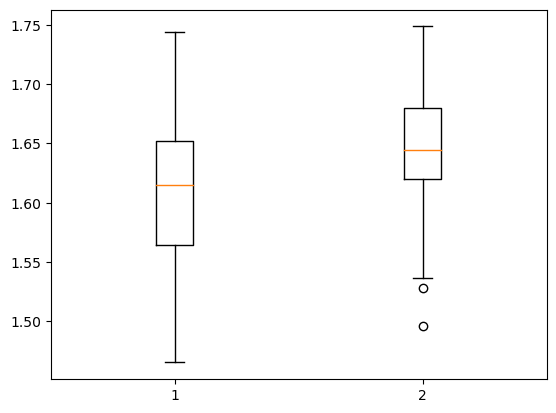

In [417]:
plt.boxplot([mse_cnn_rna.iloc[-1], mse_cnn_prot.iloc[-1]])

In [381]:
def multi_mean_ranking(df): 
    
    rankings = {}
    for d_type in df.columns:
        rankings[d_type] = []
    for _, row in df.iterrows():
        row = row.sort_values(ascending=True)
        for d_type in df.columns:
            rank = np.where(row.index==d_type)[0][0]
            rankings[d_type].append(rank + 1)
    rankings_df = pd.DataFrame(
        [np.mean(rankings[d_type]) for d_type in df.columns])
    rankings_df.index = df.columns
    
    
    
    return rankings_df

In [382]:
df = pd.DataFrame((mse_xg_rna.iloc[-1], mse_xg_prot.iloc[-1]), index=['rna', 'prot']).T
multi_mean_ranking(df)

,0
rna,1.166667
prot,1.833333


In [393]:
df = pd.DataFrame((mse_cnn_rna.iloc[-1], mse_cnn_prot.iloc[-1]), index=['rna', 'prot']).T
multi_mean_ranking(df)

,0
rna,1.333333
prot,1.666667


## R2 plot

25
20


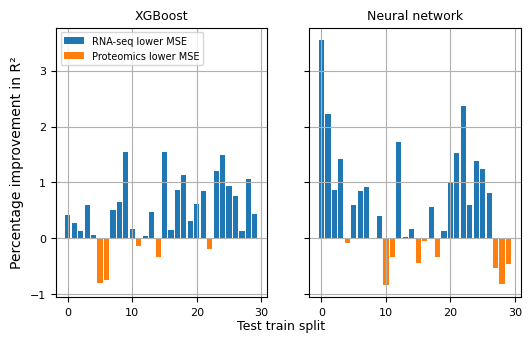

In [398]:
_figsize = (6, 3.5)
_fontsize = 9

fig, axs = plt.subplots(1, 2, figsize=_figsize, sharey=True)

rna_imp, xg_imp, _ = ave_ranking(r2_xg_rna.iloc[-1], r2_xg_prot.iloc[-1], 
                                 metric='r2')
axs[0].bar(rna_imp.index, rna_imp, label='RNA-seq lower MSE')
axs[0].bar(xg_imp.index, xg_imp, label='Proteomics lower MSE')
axs[0].set_ylabel(f'Percentage improvement in R\u00B2')

rna_imp, xg_imp, _ = ave_ranking(r2_cnn_rna.iloc[-1], r2_cnn_prot.iloc[-1], 
                                 metric='r2')
axs[1].bar(rna_imp.index, rna_imp)
axs[1].bar(xg_imp.index, xg_imp)

for ax in axs:
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0].set_title('XGBoost', fontsize=_fontsize)
axs[1].set_title('Neural network', fontsize=_fontsize)

fig.supxlabel('Test train split', fontsize=_fontsize)
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles, labels,loc='upper left',  fontsize=_fontsize - 2)
plt.savefig('Figs/tt_split_rna_prot_R2.png', dpi=600, bbox_inches='tight')
plt.show()

## Spear plots

In [288]:
def extract_spear(df, train_set_size_ind=-1):
    vals = []
    for run in  df.iloc[train_set_size_ind]:
        val = float(run.split(',')[0].split('(')[1])
        vals.append(val)
    return pd.DataFrame(np.array(vals), index=df.columns)

25
24


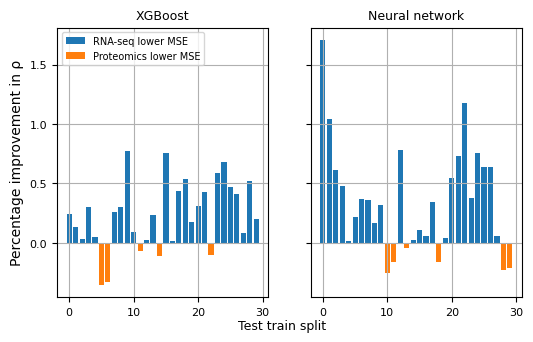

In [399]:
_figsize = (6, 3.5)
_fontsize = 9

fig, axs = plt.subplots(1, 2, figsize=_figsize, sharey=True)

rna_imp, xg_imp, _ = ave_ranking(extract_spear(rho_xg_rna)[0], 
                                 extract_spear(rho_xg_prot)[0], 
                                 metric='r2')
axs[0].bar(rna_imp.index, rna_imp, label='RNA-seq lower MSE')
axs[0].bar(xg_imp.index, xg_imp, label='Proteomics lower MSE')
axs[0].set_ylabel(f'Percentage improvement in \u03C1')

rna_imp, xg_imp, _ = ave_ranking(extract_spear(rho_cnn_rna)[0], 
                                 extract_spear(rho_cnn_prot)[0], 
                                 metric='r2')
axs[1].bar(rna_imp.index, rna_imp)
axs[1].bar(xg_imp.index, xg_imp)

for ax in axs:
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0].set_title('XGBoost', fontsize=_fontsize)
axs[1].set_title('Neural network', fontsize=_fontsize)

fig.supxlabel('Test train split', fontsize=_fontsize)
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles, labels,loc='upper left',  fontsize=_fontsize - 2)
plt.savefig('Figs/tt_split_rna_prot_rho.png', dpi=600, bbox_inches='tight')
plt.show()

In [394]:
1

1

20


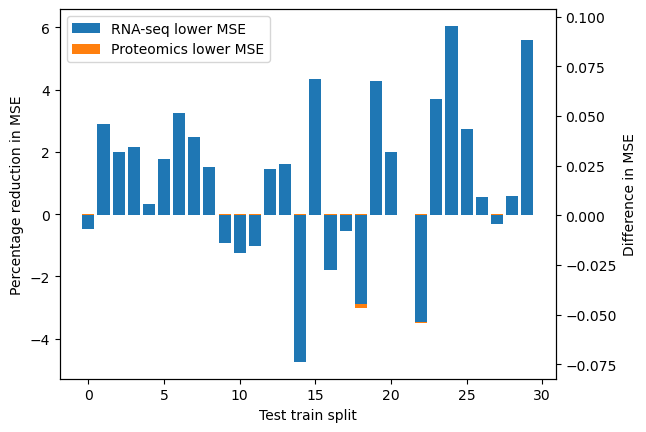

In [138]:
## Does't work putting them on the same graph as the bars are a bit different
fig, ax = plt.subplots()
rna_imp, xg_imp, _ = ave_ranking(mse_xg_rna.iloc[-1], mse_xg_prot.iloc[-1])
ax.bar(rna_imp.index, rna_imp, label='RNA-seq lower MSE')
ax.bar(xg_imp.index, xg_imp, label='Proteomics lower MSE')
plt.ylabel('Percentage reduction in MSE')
plt.xlabel('Test train split')
plt.legend()

ax2 = ax.twinx()
ax2.bar(x, (mse_xg_prot.iloc[-1] - mse_xg_rna.iloc[-1]))
ax2.set_ylabel('Difference in MSE')
plt.xlabel('Test train split')
plt.show()

plt.show()

## variation between tt splits

Can I just say that the sd across runs for a given omics type is the same size as the biggest differnce between the omics types and thats why we don't see signficant differences? Or need more?

So saying can't see omics differnces due to scale of differnce being too small. (But can see differnces in XG vs nn's). Not saying there is no differnces just not as importnat as test train split or model selection. 

In [318]:
mse_xg_rna.iloc[-1].std()

0.07110078690517009